In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
nas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/EDA_nas.csv', sep=',')

nas.head()

,STUID,State,District,Gender,Age,Category,Same.language,Siblings,Handicap,Father.edu,...,Express.science.views,Watch.TV,Read.magazine,Read.a.book,Play.games,Help.in.household,Maths..,Reading..,Science..,Social..
0,26011001001,Maharashtra,1,Girl,13 years,3.0,2.0,1 sibling,No,Illiterate,...,Agree,Every day,Never,Once a month,Once a week,Every day,NaN,33.33,NaN,NaN
1,26011001002,Maharashtra,1,Girl,15 years,3.0,2.0,3 siblings,No,NaN,...,Agree,Once a week,Never,Never,Once a week,Every day,NaN,62.07,NaN,NaN
2,26011001003,Maharashtra,1,Girl,14 years,3.0,2.0,3 siblings,No,Degree & above,...,Agree,Every day,Once a month,Once a month,Once a week,Every day,NaN,41.38,NaN,NaN
3,26011001004,Maharashtra,1,Boy,13 years,3.0,2.0,3 siblings,No,Secondary,...,Agree,Every day,Every day,Never,Every day,Every day,29.82,NaN,NaN,NaN
4,26011001005,Maharashtra,1,Girl,14 years,3.0,2.0,2 siblings,No,Primary,...,Neither,Never,Never,Once a month,Once a week,Every day,NaN,NaN,27.27,NaN


In [7]:
nas_maths = nas[nas['State'] == 'Maharashtra'].groupby('Solve.Maths').agg({'Maths..':'mean'})

nas_maths

,Maths..
Solve.Maths,
Agree,32.800920
Disagree,30.841321
Neither,29.384388


In [8]:


nas_maths = nas.groupby('Mother.edu').agg({'Reading..':'mean'})

nas_maths

,Reading..
Mother.edu,
Degree & above,70.294286
Illiterate,49.477253
Primary,56.306995
Secondary,59.685071
Sr secondary,66.873282


In [13]:
import plotly.express as px


# df = px.data.tips()
fig = px.box(nas, x="Mother.edu", y="Reading..")
fig.show()

In [18]:
pop = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cleaned_population.csv', sep=',')

pop[pop['AgeGroup'] == '20-24'].head()

,TableName,StateCode,DistrictCode,AreaName,AreaCategory,AgeGroup,TotalPopulation,TotalMale,TotalFemale,Totalilliterate,TotalMaleilliterate,TotalFemaleilliterate,Totalliterate,TotalMaleliterate,TotalFemaleliterate
15,C2308,0,0,INDIA,Total,20-24,111424222,57584693,53839529,18679492,6467026,12212466,92744730,51117667,41627063
44,C2308,0,0,INDIA,Rural,20-24,73835046,38138662,35696384,15077525,4963696,10113829,58757521,33174966,25582555
73,C2308,0,0,INDIA,Urban,20-24,37589176,19446031,18143145,3601967,1503330,2098637,33987209,17942701,16044508
102,C2308,1,0,State - JAMMU & KASHMIR,Total,20-24,1160913,603578,557335,236770,74478,162292,924143,529100,395043
131,C2308,1,0,State - JAMMU & KASHMIR,Rural,20-24,827361,423292,404069,197423,59389,138034,629938,363903,266035


In [16]:
pop_female_illiterates = pop[pop['AgeGroup'] == '20-24']


pop_female_illiterates.groupby('AgeGroup').agg({'TotalFemaleilliterate':'sum'})

,TotalFemaleilliterate
AgeGroup,
20-24,48849864


In [19]:
pop_female_illiterates.groupby('AgeGroup').agg({'TotalFemale':'sum'})

,TotalFemale
AgeGroup,
20-24,215358116


In [22]:
print(48849864/215358116* 100)

22.68308476472742


In [25]:
## Calculate no. of literates in each age group

pop['literatesFraction'] = (pop['Totalliterate']/pop['TotalPopulation'])*100

pop.groupby('AgeGroup').agg({'literatesFraction':'mean'})

,literatesFraction
AgeGroup,
0-6,0.000000
10,90.847196
11,93.456359
12,93.830372
13,94.479573
14,94.054096
15,92.872244
16,92.728518
17,92.737964


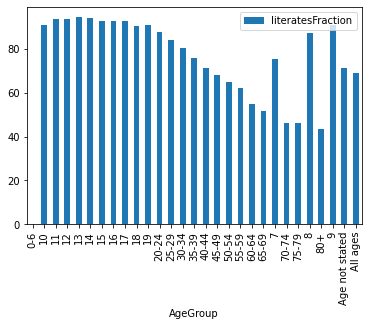

In [30]:
pop.groupby('AgeGroup').agg({'literatesFraction':'mean'}).plot(kind='bar')

In [40]:
pop['femaleliteratesFraction'] = (pop['TotalFemaleliterate']/pop['Totalliterate'])*100

pop.groupby('AreaName').agg({'femaleliteratesFraction':'mean'}).sort_values(by='femaleliteratesFraction' , ascending = False)

,femaleliteratesFraction
AreaName,
State - KERALA,50.345562
State - MEGHALAYA,47.503544
State - MIZORAM,47.406999
State - GOA,47.253597
State - PUDUCHERRY,46.262013
State - TRIPURA,46.059272
State - LAKSHADWEEP,45.041220
State - TAMIL NADU,44.400737
State - WEST BENGAL,44.004264


In [38]:
# lowest literacy rate in whole pop

pop.groupby('AreaName').agg({'literatesFraction':'median'}).sort_values(by='literatesFraction' , ascending = True)

,literatesFraction
AreaName,
State - BIHAR,69.452002
State - UTTAR PRADESH,69.787354
State - ARUNACHAL PRADESH,70.768870
State - JHARKHAND,72.574053
State - RAJASTHAN,72.703614
State - JAMMU & KASHMIR,73.433647
State - MADHYA PRADESH,75.166454
State - ANDHRA PRADESH,75.543051
State - CHHATTISGARH,77.764643
